In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [6]:
df.isnull().any().any()

False

In [7]:
df = df.rename(columns={
    'satisfaction_level' : 'Satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'projectCount',
    'average_montly_hours': 'averageMontlyHours',
    'time_spend_company': 'yearsSpent',
    'Work_accident': 'workAccident',
    'promotion_last_5years':'promotion',
    'sales':'department',
    'left': 'turnover'
    
})

In [8]:
df.columns

Index(['Satisfaction', 'evaluation', 'projectCount', 'averageMontlyHours',
       'yearsSpent', 'workAccident', 'turnover', 'promotion', 'department',
       'salary'],
      dtype='object')

In [9]:
df.head()

,Satisfaction,evaluation,projectCount,averageMontlyHours,yearsSpent,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
turnover_rate = df['turnover'].mean()

In [11]:
turnover_rate

0.2380825388359224

23.8% of the employee left

In [12]:
## Turnover Summary
turnover_summary = df.groupby('turnover')

In [13]:
turnover_summary.mean()

,Satisfaction,evaluation,projectCount,averageMontlyHours,yearsSpent,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
## Correlation


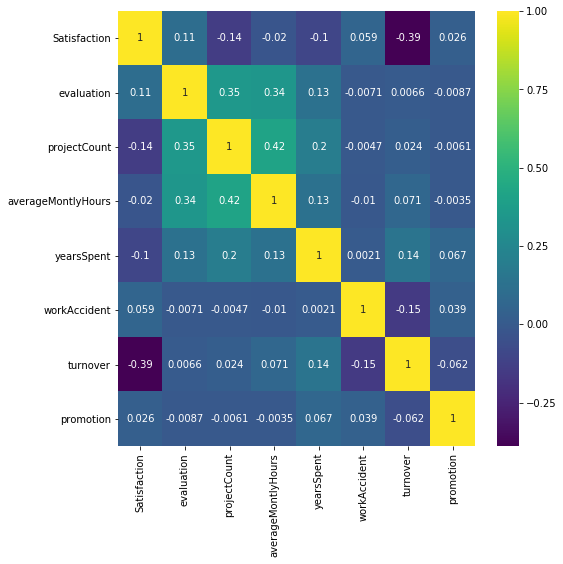

In [20]:
ply.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

1. Turnover and satisfaction are negatively correlated
2. project count and satisfaction are negatively correlated
3. WorkAccident and turnover are -vely correlated

4. AvgMonthlyHour and Project count and evaluated - are +ve'ly correlated
i.e More the project more is the hours sprnt and more is their avaluation

## Statical test for correlation
    One sample t-test:-
    Weather a sample mean differs from population mean.
    Since satisfaction has highest correlation with our dependent variable
    Lets test to see the avg. satisfaction level of employee, that had a turnover differs fromthose who stayed

    Null Hypothesis: There is no diff. in satisfaction level between employees who left and who stayed
    Alternate Hypothesis: There is diff between satifaction level of employees who left and who stayed

In [23]:
## Mean Employee turnover satisfaction level
## Mean of employee population satisfaction

In [29]:
len(df['Satisfaction'][df['turnover']==0])

11428

In [30]:
df['Satisfaction'][df['turnover']==0].mean()

0.666809590479516

In [31]:
df['Satisfaction'][df['turnover']==1].mean()

0.44009801176140917

In [32]:
len(df['Satisfaction'][df['turnover']==1])

3571

In [42]:
emp_population = df['Satisfaction']

emp_population.mean()

emp_turnover_satisfaction= df[df['turnover']==1]['Satisfaction']
emp_turnover_satisfaction.mean()

print('Satisfaction level of population is:',emp_population.mean())
print('Satisfaction level of turnover is:',emp_turnover_satisfaction.mean())

Satisfaction level of population is: 0.6128335222348166
Satisfaction level of turnover is: 0.44009801176140917


In [43]:
## Conduct T-test on the sample

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Employee Count')

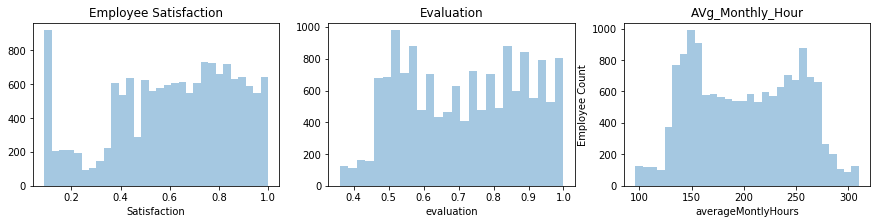

In [56]:
## Setup a matplotlib figure
fig, axes = plt.subplots(ncols = 3, figsize=(15,3))

# Graph Employee satisfaction
sns.distplot(df['Satisfaction'], ax=axes[0], kde = False).set_title('Employee Satisfaction')

# Graph Employee satisfaction
sns.distplot(df['evaluation'], ax=axes[1], kde = False).set_title('Evaluation')

# Graph Employee satisfaction
sns.distplot(df['averageMontlyHours'], ax=axes[2], kde = False).set_title('AVg_Monthly_Hour')
axes[2].set_ylabel('Employee Count')



In [57]:
## Evaluation and avg. monhly hour


In [58]:
##Could employees be grouped in these features
## Is there a correlation between evaluation and avg. monthly hour -: 0.34

In [60]:
## Salary vs Turnover

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


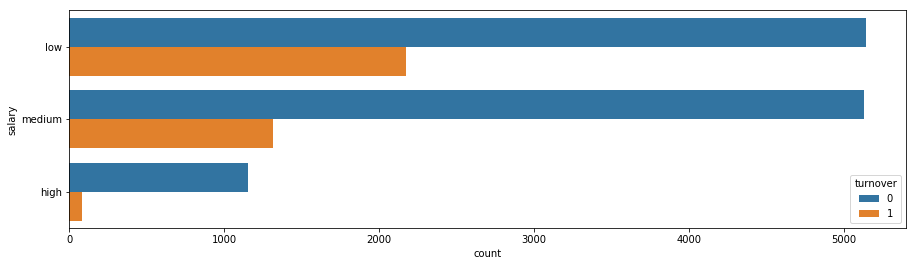

In [61]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(y='salary',hue='turnover',data=df)

In [62]:
## Very few people with high salary left the org.

1. What made employee with high salary to leave?
2. What is the workenvironment of people with medium and low salary

Department VS Turnover

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

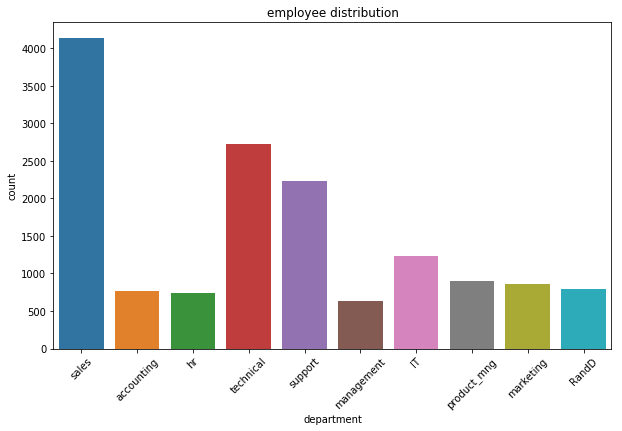

In [69]:
plt.figure(figsize=(10,6))
sns.countplot(x='department', data= df).set_title('employee distribution')
plt.xticks(rotation=45)

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


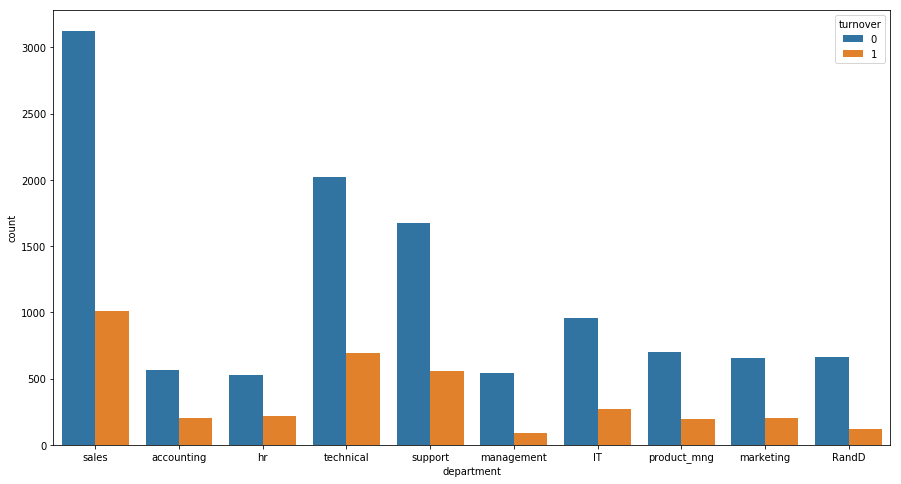

In [70]:
##Put hue as turnover
f,ax = plt.subplots(figsize=(15,8))
sns.countplot(df['department'], hue='turnover', data = df)

## Turnover vs project count
Re-print the plot with salary == medium and low

In [72]:
med_low_salary = df[df['salary']!='high']

In [73]:
len(med_low_salary)

13762

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


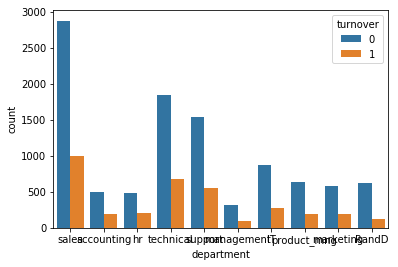

In [74]:
sns.countplot(med_low_salary['department'], hue= 'turnover', data=med_low_salary)

In [75]:
high_salary = df[df['salary']=='high']

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


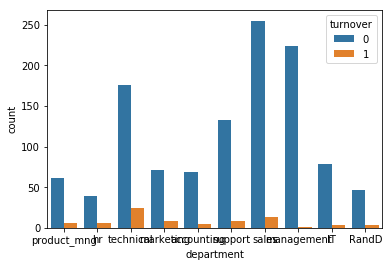

In [76]:
sns.countplot(high_salary['department'], hue= 'turnover', data=high_salary)

In [80]:
low_salary = df[df['salary']=='low']

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


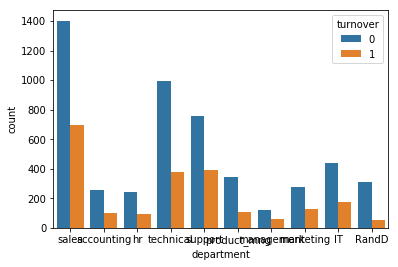

In [81]:
sns.countplot(low_salary['department'], hue= 'turnover', data=low_salary)

In [82]:
## Turnover vs project counts

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


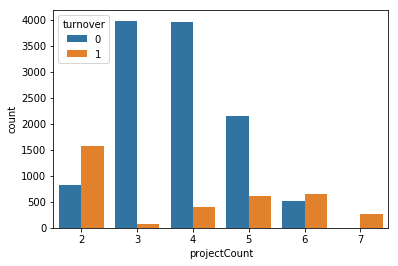

In [83]:
## both are categorical value

sns.countplot(x='projectCount', hue= 'turnover', data= df)

project count : 2,6,7 - left
project count : 3,4,5 - stayed

## Turnover vs evaluation

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


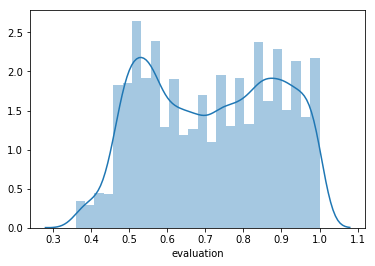

In [85]:
sns.distplot(df['evaluation'])

In [86]:
## there is a binomial distribution of evaluation

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Evaluation Vs Turnover')

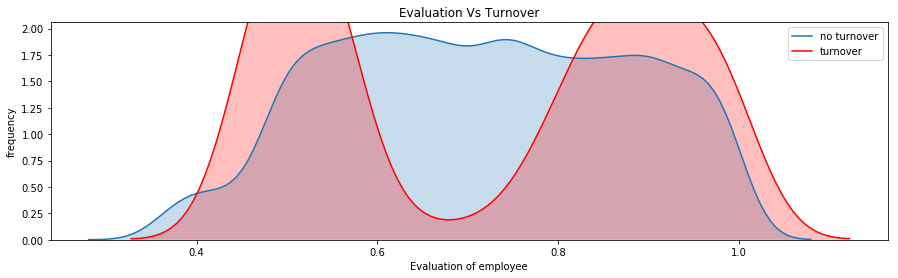

In [98]:
fig = plt.figure(figsize= (15,4),)
#ax = fig.axes([0,0,12, 10])
ax = sns.kdeplot(df.loc[df['turnover']==0, 'evaluation'], shade = True, label = 'no turnover')
ax = sns.kdeplot(df.loc[df['turnover']==1, 'evaluation'], shade = True, color='r', label = 'turnover')
ax.set(xlabel='Evaluation of employee', ylabel= 'frequency')
plt.title('Evaluation Vs Turnover')

In [99]:
## Employees with low performance and high performance leave the company(lessthen 6 and more then 8)

In [100]:
## Monthly Hour VS Evaluation

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


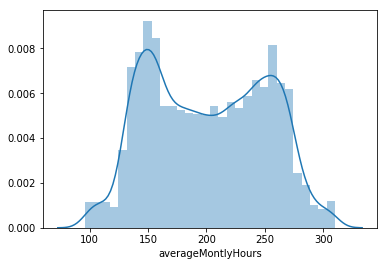

In [103]:
sns.distplot(df['averageMontlyHours'])

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Monthly Hours Vs Turnover')

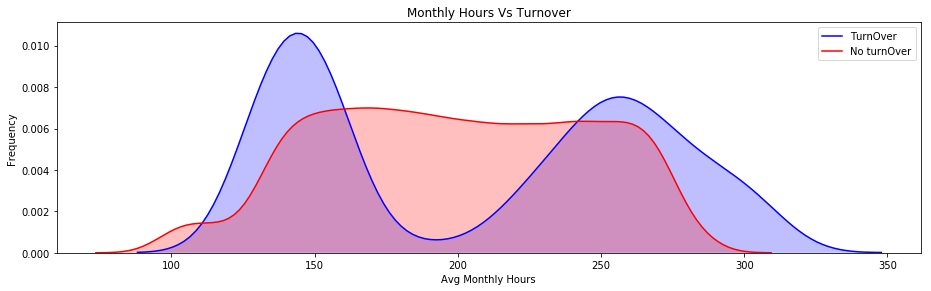

In [112]:
fig = plt.figure(figsize = (15,4))
ax = fig.add_axes([0,0,0.8,0.8])
ax = sns.kdeplot(df.loc[df['turnover']==1, 'averageMontlyHours'], color= 'blue', shade= True, label = 'TurnOver')
ax = sns.kdeplot(df.loc[df['turnover']==0, 'averageMontlyHours'], color= 'red', shade= True, label = 'No turnOver')

ax.set(xlabel = 'Avg Monthly Hours', ylabel='Frequency')
plt.title('Monthly Hours Vs Turnover')

## People who worked less then ~150 or more then ~250 hours tend to leave the company

In [113]:
## Turnover Vs Satisfaction
df.columns

Index(['Satisfaction', 'evaluation', 'projectCount', 'averageMontlyHours',
       'yearsSpent', 'workAccident', 'turnover', 'promotion', 'department',
       'salary'],
      dtype='object')

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Satisfaction distribution Vs Turnover')

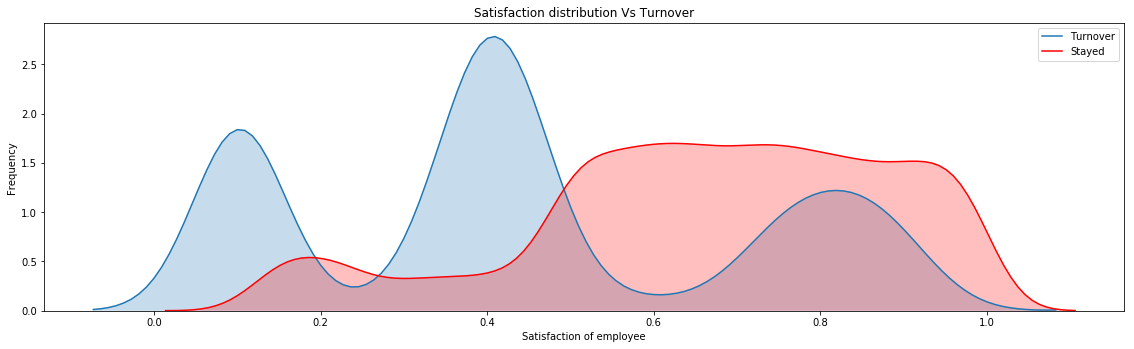

In [115]:
fig = plt.figure(figsize= (15,4))
ax = fig.add_axes([0,0,1,1])
ax = sns.kdeplot(df.loc[ df['turnover']==1,'Satisfaction'], shade= True, label= 'Turnover')
ax = sns.kdeplot(df.loc[ df['turnover']==0,'Satisfaction' ], shade = True, color = 'red', label= 'Stayed' )
ax.set(xlabel = 'Satisfaction of employee', ylabel='Frequency')
plt.title('Satisfaction distribution Vs Turnover')

In [117]:
## Satisfaction less then 5 tends to leave he company
## greater then 7 also tries to leave the country

## Sum the results
Satisfaction : less then 5 tends to leave he company greater then 7

Avg Hour : People who worked less then ~150 or more then ~250 hours tend to leave the company

Preformance :Employees with low performance and high performance leave the company(lessthen 6 and more then 8)

Salary :What made employee with high salary to leave?
Salary : What is the workenvironment of people with medium and low salary

project count : 2,6,7 - left

project count : 3,4,5 - stayed

In [118]:
## It Seems project count and Avg Hour of work are correlated

In [119]:
df['averageMontlyHours'].corr(df['projectCount'])

0.41721063440177675

In [120]:
## They are highly correlated

#### Why is the employee who left, worked for more hours

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


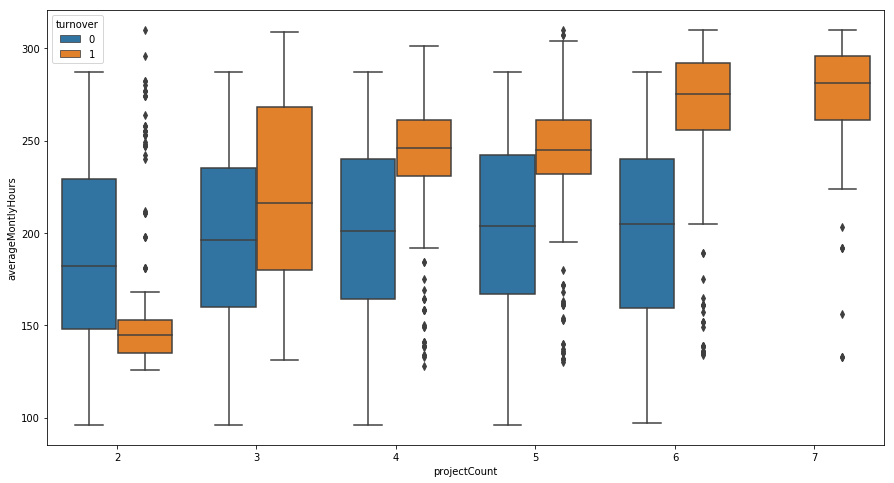

In [123]:
##boxplot
fig = plt.figure(figsize=(15,8))
sns.boxplot(x='projectCount', y='averageMontlyHours', hue='turnover', data=df)

#### People who left worked less hours, or more hours
#### Most of the employees who left had 3 projects and they worked for more then 200 hours

C:\Users\INTEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


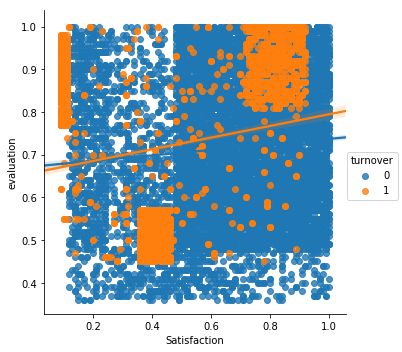

In [129]:
## Satisfaction Vs Evalyation
fig = plt.figure(figsize=(15,8))
sns.lmplot(x='Satisfaction', y='evaluation', hue='turnover', data=df)

In [127]:
df.columns

Index(['Satisfaction', 'evaluation', 'projectCount', 'averageMontlyHours',
       'yearsSpent', 'workAccident', 'turnover', 'promotion', 'department',
       'salary'],
      dtype='object')

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


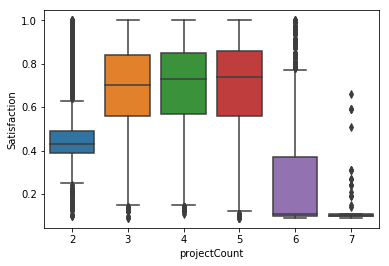

In [130]:
## Find relation between no. of projecs and evaluation
sns.boxplot(x='projectCount', y='Satisfaction', data=df)

**Clister1:- Hard Working(Good) and Sad Employee**
    We can conclude that people with 6 or more project were evaluated high because they worked hard and they left
    They were over burdened
    
**Clusterr2: Bad And sad employee**
    People with 2 projects, were evaluated low, they felt bad at work
    
**Cluster3: Happy Employee and Hard Working**
    These employees were evaluated high and they were satisfied as well
    
**Question** : They left because they found other job opportunity?
    

## KMeans Clustering for emloyee turnover

In [131]:
from sklearn.cluster import KMeans

In [140]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(df.drop(['turnover'], axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [139]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [142]:
len(kmeans.labels_)

14999

In [146]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1])

In [147]:
pd.unique(kmeans.labels_)

array([1, 0, 3, 2], dtype=int64)

In [152]:
## There are 4 objects - plot them
kmeans_colors = ['green' if c==0 else 'blue' if c==1 else 'red' if c==2 else 'yellow'  for c in kmeans.labels_]

kmeans_colors1 = ['green' if c==0 else 'blue' if c==1 else 'red' for c in kmeans.labels_]

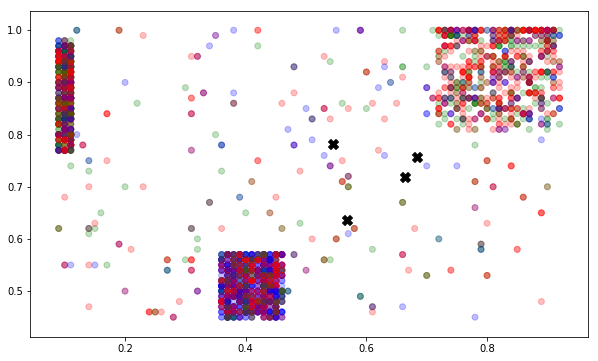

In [159]:
fig = plt.figure(figsize=(10,6))
plt.scatter(x="Satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors1)
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)

In [155]:
kmeans.cluster_centers_[:,0]

array([0.54495154, 0.56867779, 0.66423444, 0.68372478])

In [157]:
kmeans.cluster_centers_[:,1]

array([0.78290733, 0.63641849, 0.71804631, 0.75677691])

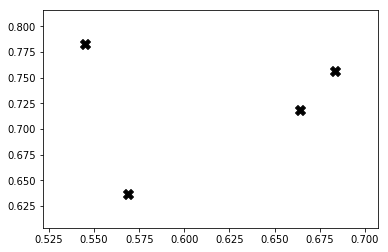

In [158]:
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)

## Feature Importance

In [160]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [161]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [ ]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train.fillna(0), y_train)

In [163]:
X = df.drop(['turnover'], axis = 1)
y = df['turnover']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

### Decision Tree

In [188]:
dtree = tree.DecisionTreeClassifier(max_depth=8,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01)

In [189]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.01, presort=False,
            random_state=None, splitter='best')

In [190]:
imp_features = dtree.feature_importances_

In [191]:
indices = np.argsort(imp_features)

In [192]:
indices

array([5, 6, 8, 7, 2, 3, 1, 4, 0], dtype=int64)

In [193]:
imp_features

array([0.51368426, 0.08389568, 0.01284501, 0.03527823, 0.35237131,
       0.        , 0.        , 0.00107981, 0.00084569])

In [194]:
indices = np.argsort(imp_features)[::-1]

In [195]:
indices

array([0, 4, 1, 3, 2, 7, 8, 6, 5], dtype=int64)

([<matplotlib.axis.XTick at 0x203b7cc6940>,
 <a list of 9 Text xticklabel objects>)

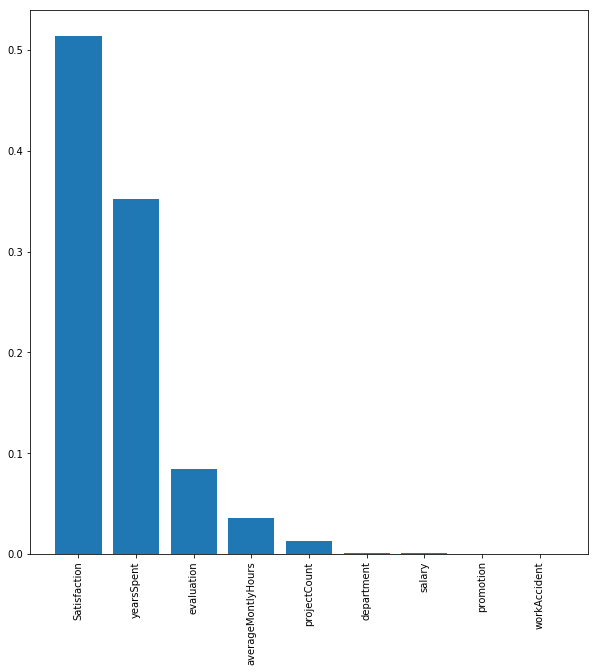

In [196]:
plt.figure(figsize = (10,10))
plt.bar(range(len(indices)), imp_features[indices])
plt.xticks(range(len(indices)), X_train.columns[indices], rotation ='vertical')

In [177]:
imp_features[indices]

array([0.49922347, 0.40482169, 0.09595484, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

### Random Forest

In [180]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [181]:
sel_.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False])

In [182]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

5

In [183]:
selected_feat

Index(['Satisfaction', 'evaluation', 'projectCount', 'averageMontlyHours',
       'yearsSpent'],
      dtype='object')

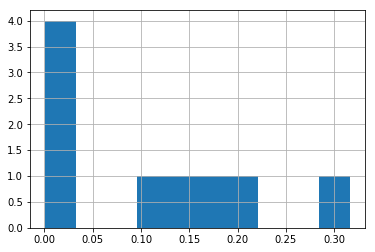

In [184]:
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

### Modling the data:- Logistic regression analysis

This is use case of the model: This can be explained to managementy of the company

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [207]:
## Take only important variables for logistic regression
df = pd.read_csv('HR_comma_sep.csv')




In [208]:
df = df.rename(columns={
    'satisfaction_level' : 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'projectCount',
    'average_montly_hours': 'averageMontlyHours',
    'time_spend_company': 'yearsSpent',
    'Work_accident': 'workAccident',
    'promotion_last_5years':'promotion',
    'sales':'department',
    'left': 'turnover'
    
})

In [213]:
df['int'] = 1
independent_var = ['satisfaction', 'evaluation','averageMontlyHours','yearsSpent', 'int', 'turnover']
df = df[independent_var]

C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [214]:
X1 = df.drop(['turnover'], axis = 1)
y1 = df['turnover']

In [215]:
df.columns

Index(['satisfaction', 'evaluation', 'averageMontlyHours', 'yearsSpent', 'int',
       'turnover'],
      dtype='object')

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.15, random_state=123)

In [219]:
X_train.head()

,satisfaction,evaluation,averageMontlyHours,yearsSpent,int
1091,0.44,0.46,157,3,1
8619,0.58,0.74,180,3,1
4218,0.89,0.68,258,2,1
2538,0.79,0.76,160,3,1
5754,0.78,0.57,177,3,1


In [221]:
import statsmodels.api as sm
logReg = sm.Logit(y_train, X_train)

In [222]:
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.467563
         Iterations 6


In [225]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               turnover   No. Observations:                12749
Model:                          Logit   Df Residuals:                    12744
Method:                           MLE   Df Model:                            4
Date:                Fri, 12 Oct 2018   Pseudo R-squ.:                  0.1503
Time:                        13:05:18   Log-Likelihood:                -5961.0
converged:                       True   LL-Null:                       -7015.6
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
satisfaction          -3.7683      0.096    -39.318      0.000      -3.956      -3.580
evaluation             0.1405      0.145      0.971      0.332      -0.143       0.424
averageMontlyHours     0.0013      0.000      2.598      0.009       0.000       0.002
yearsSpent             0.1634      0.015     10.943      0.000       0.134       0.193
int                    0.0085      0.126      0.067      0.946      -0.238       0.255
======================================================================================
"""

In [224]:
answer.params

satisfaction         -3.768329
evaluation            0.140450
averageMontlyHours    0.001256
yearsSpent            0.163397
int                   0.008460
dtype: float64

Intrepreting the summary

LLR p-value:	0.000
P>|z| = 0.00
This means model is significant

##### Coefficients
log(odds) = 0.008 + (0.16)YearSpent + (0.001)AvgMonthlyHour + (0.14)evaluation - (3.7)satisfaction

##### Log likelyhood is too samll :- Its not a good model
Log-Likelihood:	-5961.0 - the higher the better

In [228]:
np.exp(0.002)

1.0020020013340003

In [232]:
X2 = df.drop(['turnover', 'averageMontlyHours'], axis = 1)
y2 = df['turnover']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size= 0.15, random_state=123)

In [234]:
logrig = sm.Logit(y_train, X_train)

In [235]:
answer = logrig.fit()

Optimization terminated successfully.
         Current function value: 0.467828
         Iterations 6


In [236]:
answer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               turnover   No. Observations:                12749
Model:                          Logit   Df Residuals:                    12745
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Oct 2018   Pseudo R-squ.:                  0.1498
Time:                        13:29:21   Log-Likelihood:                -5964.3
converged:                       True   LL-Null:                       -7015.6
                                        LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
satisfaction    -3.7942      0.095    -39.787      0.000      -3.981      -3.607
evaluation       0.2922      0.132      2.209      0.027       0.033       0.551
yearsSpent       0.1665      0.015     11.179      0.000       0.137       0.196
int              0.1545      0.112      1.375      0.169      -0.066       0.375
================================================================================
"""

In [237]:
np.exp(-3.79)

0.022595601851121864

In [238]:
np.exp(0.29)

1.336427488025472

In [239]:
np.exp(0.16)

1.1735108709918103

In [240]:
## A function for intrepreting the coefficients

coef = answer.params
def y(coef, satisfaction, evaluation, yearsSpent):
    return coef[3] - coef[0]*satisfaction + coef[1]*evaluation +coef[2]*yearsSpent

import numpy as np
y1 = y(coef, 0.7, 0.8, 3)




In [242]:
p = np.exp(y1) / (1+np.exp(y1))
p

0.9719048704491976

## We will create 4 zones
1. Safe Zone
2. Low risk zone
3. Medium risk zone
4. High Risk

In [243]:
## We will use 4 other model

In [249]:
## Base rate model
## X.shape[0] - gives the length of DF
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [254]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.77


In [256]:
## Ytest vs 0's

In [257]:
## Check accuracy of logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [258]:
accuracy_score(y_test, model.predict(X_test))

0.756

In [261]:
print('Logistic regression accuracy:{}'.format(0.756))

Logistic regression accuracy:0.756


In [264]:
## Use 10 fold cross validation

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight= 'balanced')
scoring = 'roc_auc'

results = model_selection.cross_val_score(modelCV, X_train, y_train, cv= kfold, scoring = scoring)

In [266]:
results.mean()

0.79358705917783

In [267]:
results.std()

0.008615855433378004

## Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [268]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [286]:
print('------ Base Model --------')
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value

logis = LogisticRegression(class_weight='balanced')
logis.fit(X_train, y_train)
print('/n/n------ Logistic Model -------------')
logis_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print("Logistic AUC = %2.2f" % logis_roc_auc)
print('below is the classification report of Logistic regression')
print(classification_report(y_test, logis.predict(X_test)))

## Decision Tree


dtree = dtree.fit(X_train, y_train)
print('/n/n--------- Decision Tree---------')
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print(dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test) ))


## Random Forest
rf = RandomForestClassifier(n_estimators= 100, max_depth=None,
                           min_samples_split = 10,
                           class_weight = 'balanced')
rf.fit(X_train, y_train)
print('/n/n--------Random Forest-------')
rf_roc_auc= roc_auc_score(y_test, rf.predict(X_test))
print('Random Forest AUC= %2.2f' % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


## AdaBoost
# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))


------ Base Model --------
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      1730
          1       0.00      0.00      0.00       520

avg / total       0.59      0.77      0.67      2250

/n/n------ Logistic Model -------------
Logistic AUC = 0.74
below is the classification report of Logistic regression
             precision    recall  f1-score   support

          0       0.90      0.75      0.82      1730
          1       0.46      0.72      0.57       520

avg / total       0.80      0.74      0.76      2250

/n/n--------- Decision Tree---------
0.9418908403734992
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1730
          1       0.89      0.92      0.90       520

avg / total       0.96      0.96      0.96      2250



C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/n/n--------Random Forest-------
Random Forest AUC= 0.97
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1730
          1       0.95      0.95      0.95       520

avg / total       0.98      0.98      0.98      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.89
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1730
          1       0.91      0.81      0.86       520

avg / total       0.94      0.94      0.94      2250



### 5. Interpreting the Data
**Summary:** With all of this information, this is what Bob should know about his company and why his employees probably left:

    Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
    Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
    Employees with either really high or low evaluations should be taken into consideration for high turnover rate
    Employees with low to medium salaries are the bulk of employee turnover
    Employees that had 2,6, or 7 project count was at risk of leaving the company
    Employee satisfaction is the highest indicator for employee turnover.
    Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate
    Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

**Potential Solution**
    Binary Classification: Turnover V.S. Non Turnover

    Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

    Need for Application: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

**Solution 1:**
    We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
    OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.


**Solution 2:** Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

    Be a good coach
    Empower the team and do not micromanage
    Express interest for team member success
    Have clear vision / strategy for team
    Help team with career development


What Now?
This problem is about people decision. When modeling the data, we should not be using this predictive metric as a solution decider. But, we can use this to arm people with much better relevant information for better decision making.

We would have to conduct more experiments or collect more data about the employees in order to come up with a more accurate finding. I would recommend to gather more variables from the database that could have more impact on determining employee turnover and satisfaction such as their distance from home, gender, age, and etc.

Reverse Engineer the Problem

After trying to understand what caused employees to leave in the first place, we can form another problem to solve by asking ourselves

"What features caused employees stay?
"What features contributed to employee retention? ** There are endless problems to solve!
What would you do?


Reddit Commentor (DSPublic): I worked in HR for a couple of years and here's a few questions I have: People that have HIGH salary and not been promoted, did they leave? If so, could it be a signal that we're not developing people or providing enough opportunities?

How would you define a 'high performer' without using their last evaluation rating? Evaluations tend to be inconsistently applied across departments and highly dependent on your relationship with the person doing that evaluation. Can we do an Evaluation Vs. Departments (see if there are actual differences)? Once defined, did these high performers leave? If so, why? Are we not providing opportunities or recognizing these high performers? Is it a lack of salary?

To add some additional context, 24% turnover rate is high in general but do we know what industry this is from? If the industry norm is 50%, this company is doing great! I see you've done Turnover by dept which is great. If only we have more info and classify these turnovers.

We have voluntary and involuntary turnovers as well. Also, who are these employees - is it part timers, contract workers that turn over? We don't worry about those, they're suppose to go. I'd like to see Turnover vs. Years of service. In real life, we found a cluster / turning point where people 'turn sour' after about 5 years at the company. Can we see satisfaction vs. years at company?